=== MANUAL CALCULATIONS ===
P(X = 2) = 0.18868
P(X ≤ 2) = 0.92452

=== USING SCIPY ===
P(X = 2) = 0.18868
P(X ≤ 2) = 0.92452
Smallest x with P(X ≤ x) ≥ 0.95: 3.0
Random Samples of Defectives (20 trials):
[1 0 2 0 3 2 2 2 1 1 0 2 0 1 0 1 0 1 0 2]


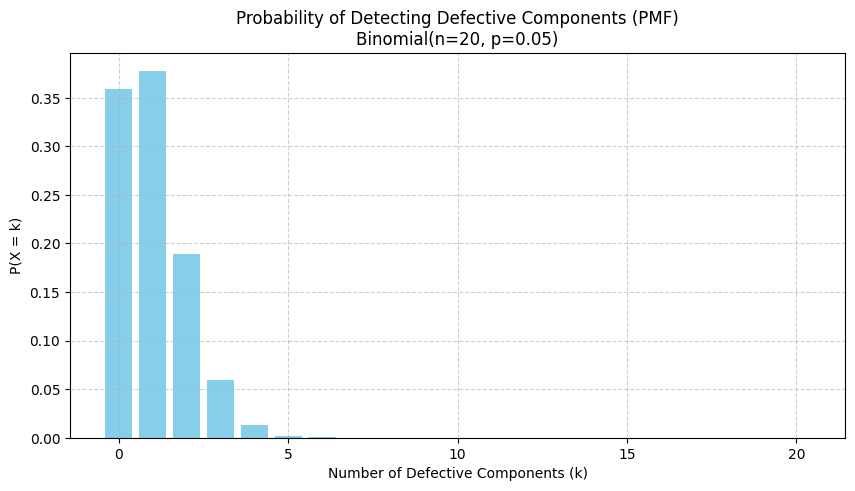

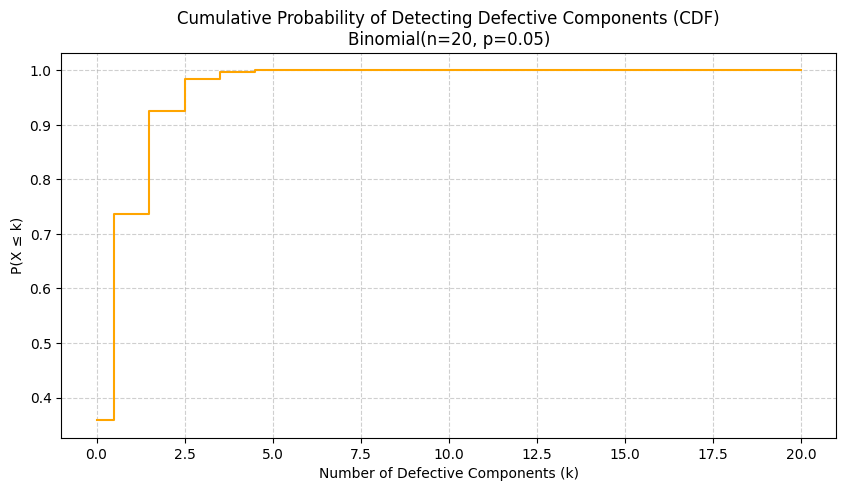


=== INTERPRETATION ===
Probability of finding more than 3 defectives (P(X > 3)) = 0.01590

If the defect probability increases to 0.2:
 - The distribution shifts to the right (mean = n*p = 4).
 - The spread increases (variance = n*p*(1-p)).
 - Higher probabilities for larger k values (more defectives expected).
 - The shape becomes less skewed and more bell-like (approaches normal).


In [3]:
import math
from scipy.stats import binom
import numpy as np
import matplotlib.pyplot as plt

def factorial(n):
    if n == 0 or n == 1:
        return 1
    else:
        return n * factorial(n - 1)

def nCr(n, r):
    return factorial(n) / (factorial(r) * factorial(n - r))

def binomial_pmf(n, k, p):
    return nCr(n, k) * (p ** k) * ((1 - p) ** (n - k))

n = 20
p = 0.05

P_X_eq_2_manual = binomial_pmf(n, 2, p)
P_X_le_2_manual = sum(binomial_pmf(n, k, p) for k in range(0, 3))

P_X_eq_2_lib = binom.pmf(2, n, p)
P_X_le_2_lib = binom.cdf(2, n, p)
x_95 = binom.ppf(0.95, n, p)
random_samples = binom.rvs(n, p, size=20)

print("=== MANUAL CALCULATIONS ===")
print(f"P(X = 2) = {P_X_eq_2_manual:.5f}")
print(f"P(X ≤ 2) = {P_X_le_2_manual:.5f}")

print("\n=== USING SCIPY ===")
print(f"P(X = 2) = {P_X_eq_2_lib:.5f}")
print(f"P(X ≤ 2) = {P_X_le_2_lib:.5f}")
print(f"Smallest x with P(X ≤ x) ≥ 0.95: {x_95}")
print(f"Random Samples of Defectives (20 trials):\n{random_samples}")

x = np.arange(0, n+1)
pmf_vals = binom.pmf(x, n, p)
cdf_vals = binom.cdf(x, n, p)

plt.figure(figsize=(10,5))
plt.bar(x, pmf_vals, color='skyblue')
plt.title("Probability of Detecting Defective Components (PMF)\nBinomial(n=20, p=0.05)")
plt.xlabel("Number of Defective Components (k)")
plt.ylabel("P(X = k)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
print()
plt.figure(figsize=(10,5))
plt.step(x, cdf_vals, where='mid', color='orange')
plt.title("Cumulative Probability of Detecting Defective Components (CDF)\nBinomial(n=20, p=0.05)")
plt.xlabel("Number of Defective Components (k)")
plt.ylabel("P(X ≤ k)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

P_X_gt_3 = 1 - binom.cdf(3, n, p)

print("\n=== INTERPRETATION ===")
print(f"Probability of finding more than 3 defectives (P(X > 3)) = {P_X_gt_3:.5f}")
print("\nIf the defect probability increases to 0.2:")
print(" - The distribution shifts to the right (mean = n*p = 4).")
print(" - The spread increases (variance = n*p*(1-p)).")
print(" - Higher probabilities for larger k values (more defectives expected).")
print(" - The shape becomes less skewed and more bell-like (approaches normal).")
